In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# (xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar10.load_data()

xtest = xtest/xtest.max()
xtrain = xtrain/xtrain.max()
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


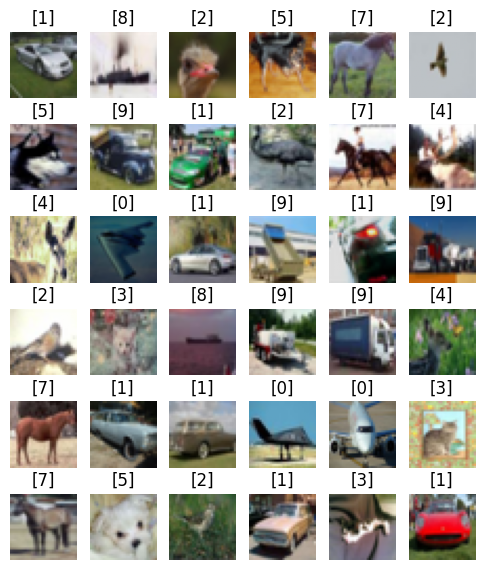

In [ ]:
plt.figure(1,(6,7))
for i in range(1,36+1,1):
  temp = np.random.randint(0,50000)
  im = xtrain[temp,:,:]
  lab= ytrain[temp]
  plt.subplot(6,6,i)
  plt.imshow(im,cmap='gray')
  plt.axis('off')
  plt.title(lab)

In [ ]:
nn_model = keras.Sequential()
#framwork
nn_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2],xtrain.shape[3])))#input layer
nn_model.add(keras.layers.Dense(128,activation='relu')) #hidden layer
nn_model.add(keras.layers.Dense(256,activation='relu'))
nn_model.add(keras.layers.Dense(256,activation='relu'))

nn_model.add(keras.layers.Dense(len(np.unique(ytrain))))#output layer


#optimizer
nn_model.compile(optimizer='SGD',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(nn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               393344    
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 494730 (1.89 MB)
Trainable params: 494730 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = nn_model.fit(xtrain,ytrain,epochs=20)


Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9039 - accuracy: 0.3136
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7058 - accuracy: 0.3899
Epoch 3/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6231 - accuracy: 0.4229
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5643 - accuracy: 0.4449
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5177 - accuracy: 0.4594
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4798 - accuracy: 0.4747
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4454 - accuracy: 0.4864
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4182 - accuracy: 0.4979
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3925 - accuracy: 0.5074
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - l

Text(0, 0.5, 'Accuracy')

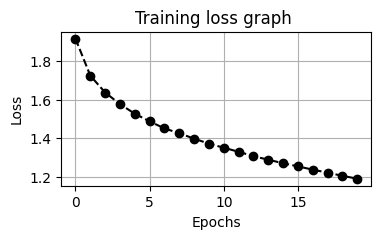

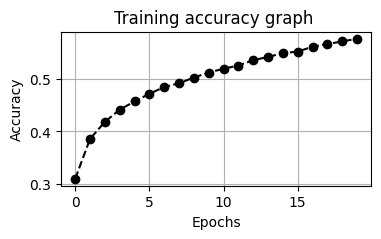

In [ ]:
# visualize the training loss and acc
plt.figure(1,(4,2))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
[loss,acc]=nn_model.evaluate(xtest,ytest)
print('Loss:',loss)
print('testing Accuracy:',acc)



313/313 [==============================] - 2s 4ms/step - loss: 0.0831 - accuracy: 0.9746
Loss: 0.08305838704109192
testing Accuracy: 0.9746000170707703
